### El objetivo de este script es encontrar agrupamientos de las ciudades de más de 100.000 habitantes de España partir del resultado del análisis factorial realizada en R.


# I. Cargar datos y escalar variables

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation  
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
from sklearn.metrics import silhouette_score

Se importan los datos escalados 

In [3]:
data_types = {
    'Ciudades' : 'string'
}

In [4]:
df_datos_std = pd.read_csv("./datos_escalados/df_datos_std.csv", encoding = "ISO-8859-1", index_col=[0])

 Vamos a probar con una nueva combinacion de factores que provienen de Seleccion_1: df_datos_MinMax, nfactors = 5, fm=minchi, rotate = varimax 

In [5]:
df_datos_MM = pd.read_csv("./datos_escalados/df_datos_MinMax.csv", encoding = "ISO-8859-1", index_col = [0])

Se calculan los scores a partir de uno de los resultados del análisis Factorial. Parámetros del AF seleccionado (Sin AM, df_datos_std, nfactors = 5, fm = minchi, rotate = varimax). Los scores se calculan utilizando una suma ponderada de los factores que alcanzaron un valor de carga aproximadamente igual o mayor  a 0.7.

Pregunta cuál es la distribución de los factores creados. Eventualmente podríamos hacer un nuevo análisis exploratorio para el resultado de los factores. 

¿Cómo se interpretan las siguientes variables estás variables construidas?

F2_std_2: Path aggregation
F4_std_4: Residential Unit Intensity
F1_std_1: Path Form Complexity
F3_std_3: Population-Driven Urban Shape
F5_std_5: Regional GDP Influence

In [6]:
df_datos_std['F2'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854
df_datos_std['F4'] = df_datos_std.loc[:,"RES_UNI"] * 0.756
df_datos_std['F1'] = df_datos_std.loc[:,"ED"] * 0.875
df_datos_std['F3'] = df_datos_std.loc[:,"LSI"] * 0.824 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std['F5'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692

Otros factores construidos



¿Cómo se interpretan estás variables construidas?

F2_std_2: Path aggregation
F4_std_4: Aggregated Housing 
F1_std_1: Complex residencial use
F3_std_3: Residencial Population-Driven Urban Shape
F5_std_5: Office and Regional Economic Influence

In [7]:
df_datos_std_1 = df_datos_std.copy()
df_datos_std_1['F2'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854   
df_datos_std_1['F4'] = df_datos_std.loc[:,"RES_UNI"] * 0.756 + df_datos_std.loc[:,"SPLIT"] * 0.558 + df_datos_std.loc[:,"TA"] * 0.577 
df_datos_std_1['F1'] = df_datos_std.loc[:,"ED"] * 0.875 + df_datos_std.loc[:,"IJI"] * 0.588 + df_datos_std.loc[:,"RES_PLU"] * 0.5230
df_datos_std_1['F3'] = df_datos_std.loc[:,"LSI"] * 0.828 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std_1['F5'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692 + df_datos_std.loc[:,"OFI"] * 0.598 

Se construyen los factores para df_datos_MM

¿Cómo se interpretan estás variables construidas?

MM_F2: Population Driven Landscape Complexity
MM_F1: Patch Aggregation Complexity
MM_F4: Fragmented Housing Dominance
MM_F5: Landscape Shape Complexity
MM_F3: Patches size aggregated landscape

In [8]:
df_datos_MM['F2'] = df_datos_MM.loc[:,"LSI"] * 0.784 + df_datos_MM.loc[:,"TE"] * 0.943 + df_datos_MM.loc[:,"T_Viviendas"] * 0.985 + df_datos_MM.loc[:,"PobT"] * 0.988 + df_datos_MM.loc[:,"Vehiculos"] * 0.995
df_datos_MM['F1'] = df_datos_MM.loc[:,"LPI"] * 0.953 + df_datos_MM.loc[:,"AREA_AM"] * 0.987 + df_datos_MM.loc[:,"GYRATE_AM"] * 0.986 + df_datos_MM.loc[:,"MESH"] * 0.988 + df_datos_MM.loc[:,"ED_SING"] * 0.863
df_datos_MM['F4'] = df_datos_MM.loc[:,"RES_UNI"] * 0.756 + df_datos_MM.loc[:,"SPLIT"] * 0.632 
df_datos_MM['F5'] = df_datos_MM.loc[:,"SHAPE_MN"] * 0.922 + df_datos_MM.loc[:,"SHAPE_MD"] * 0.920 + df_datos_MM.loc[:,"FRAC_MD"] * 0.844
df_datos_MM['F3'] = df_datos_MM.loc[:,"AREA_MN"] * 0.789 + df_datos_MM.loc[:,"AREA_MD"] * 0.861 + df_datos_MM.loc[:,"GYRATE_MN"] * 0.951 + df_datos_MM.loc[:,"GYRATE_MD"] * 0.872 

Tercer dataset datos transformados



In [9]:
df_datos_Ptrans = pd.read_csv("./datos_escalados/df_datos_PTrans.csv", encoding = "ISO-8859-1", index_col=[0])
df_datos_Ptrans_1 = df_datos_Ptrans.copy()

Se construyen los factores para Ptrans

¿Cómo se interpretan estás variables construidas?

Ptrans_F1: Population Driven Landscape Complexity
Ptrans_F2: Inverse Edge and Area Relationship
Ptrans_F3: Diversity-Eveness Index
Ptrans_F4: Fragmented patch landscape
Ptrans_F5: Low Unifamiliar Housing Influence

In [10]:
df_datos_Ptrans['F1'] = df_datos_Ptrans.loc[:,"LSI"] * 0.810 + df_datos_Ptrans.loc[:,"TE"] * 0.924 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.979 + df_datos_Ptrans.loc[:,"PobT"] * 0.979 + df_datos_Ptrans.loc[:,"Vehiculos"] * 0.965 
df_datos_Ptrans['F2'] = df_datos_Ptrans.loc[:,"ED"] * 0.930 + df_datos_Ptrans.loc[:,"AREA_MN"] * -0.878
df_datos_Ptrans['F3'] = df_datos_Ptrans.loc[:,"SHEI"] * 0.991 + df_datos_Ptrans.loc[:,"SIDI"] * 0.951 
df_datos_Ptrans['F4'] = df_datos_Ptrans.loc[:,"LPI"] * -0.821 + df_datos_Ptrans.loc[:,"AREA_AM"] * -0.862 + df_datos_Ptrans.loc[:,"MESH"] * -0.881 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.804 + df_datos_Ptrans.loc[:,"DIVISION"] * 0.793
df_datos_Ptrans['F5'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.784

Se construyen los factores para Ptrans_1

¿Cómo se interpretan estás variables construidas?

Ptrans_1_F1: Fragmented Multi-Family Housing
Ptrans_1_F3: Population Driven Urban Complexity
Ptrans_1_F2: Patch Fragmentation Dominance
Ptrans_1_F4: Low Unifamiliar Housing Influence
Ptrans_1_F5: Diversity Driven Landscape

In [11]:
df_datos_Ptrans_1['F1'] = df_datos_Ptrans.loc[:,"AREA_MN"] * -0.815 + df_datos_Ptrans.loc[:,"ED"] * 0.913 + df_datos_Ptrans.loc[:,"RES_PLU"] * 0.654
df_datos_Ptrans_1['F3'] = df_datos_Ptrans.loc[:,"LSI"] * 0.755 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.957
df_datos_Ptrans_1['F2'] = df_datos_Ptrans.loc[:,"LPI"] * -0.848 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.834 + df_datos_Ptrans.loc[:,"MESH"] * -0.764
df_datos_Ptrans_1['F4'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.817 
df_datos_Ptrans_1['F5'] = df_datos_Ptrans.loc[:,"SIDI"] * 0.751

# II.- Eliminar outliers

En este paso tenemos la opción de quitar outliers: sabemos por el análisis exploratorio previo que Torrejón de Ardoz, Madrid, y Barcelona representan outliers en diversas variables y observaciones. Torrejón debido el gran tamaño del polígono de la base militar; Madrid y Barcelona, por el gran tamaño de la ciudad y alta población.

In [12]:
df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_std_1 = df_datos_std_1[df_datos_std_1['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_MM = df_datos_MM[df_datos_MM['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_Ptrans_1 = df_datos_Ptrans_1[df_datos_Ptrans_1['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)

Eliminamos Madrid

In [13]:
df_datos_std_TM = df_datos_std[df_datos_std['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_std_1_TM = df_datos_std_1[df_datos_std_1['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_MM_TM = df_datos_MM[df_datos_MM['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_Ptrans_TM = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_Ptrans_1_TM = df_datos_Ptrans_1[df_datos_Ptrans_1['Ciudades'] != 'Madrid'].reset_index(drop = True)

Eliminamos Barcelona

In [14]:
df_datos_std_TMB = df_datos_std_TM[df_datos_std_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_std_1_TMB = df_datos_std_1_TM[df_datos_std_1_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_MM_TMB = df_datos_MM_TM[df_datos_MM_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_Ptrans_TMB = df_datos_Ptrans_TM[df_datos_Ptrans_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_Ptrans_1_TMB = df_datos_Ptrans_1_TM[df_datos_Ptrans_1_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)

# III.- Escalado

El análisis de agrupamiento requiere  que los datos estén escalados. En este caso, los datos originales fueron escalados antes de realizar el análisis factorial. Sin embargo, al calcular los scores a partir de la suma ponderada de los items que mostraron cargas igual o mayor a 0.7 a cada factor, los valores han perdido su escalamiento, y sería necesario en estricto rigor realizar uno nuevo.

Se crea un nuevo dataset a partir de la selección de los factores construidos que contiene datos númericos.

In [15]:
df_datos_std_clus = df_datos_std.loc[:,['F1','F2','F3','F4','F5']]

In [16]:
df_datos_std_clus.loc[:,['F1','F2','F3','F4','F5']]

F1        F2        F3        F4        F5
0  -0.407437 -0.499535 -0.262515  0.485211 -0.177092
1  -1.038192 -0.130561 -0.664670 -0.801564  0.139842
2  -1.475112 -0.146921 -1.211497  0.824612  2.555019
3  -0.992170 -0.455778 -1.047413 -0.853977  0.263686
4   0.350127 -1.057777 -0.332275  1.686345 -1.004493
..       ...       ...       ...       ...       ...
66  0.686712 -0.711340  2.284940 -0.828068  0.419490
67 -1.274397 -0.545220 -0.021397 -0.457144  0.585503
68  0.748328 -0.635265  1.676140  1.207623  0.104775
69  0.093911  0.142310 -1.026051 -0.238706 -0.019512
70 -0.975552 -0.599232  1.406054 -0.540330  0.573518

[71 rows x 5 columns]

In [17]:
df_datos_std_clus.shape

(71, 5)

In [18]:
## Se crea el objeto de standarscaler
std = StandardScaler()

## Se utiliza el objeto para en un solo paso ajustar y transformar los datos del dataframe
datos_std_clus_std = std.fit_transform(df_datos_std_clus.iloc[:,0:5])

In [19]:
col = ['F1', 'F2', 'F3', 'F4', 'F5']

In [20]:
# Se transforman los datos desde un array a un dataframe
df_datos_std_clus_std = pd.DataFrame(datos_std_clus_std, columns = col)

In [21]:
df_datos_std_clus_std

F1        F2        F3        F4        F5
0  -0.527003 -0.277288 -0.179063  0.626365 -0.261183
1  -1.281831  0.247822 -0.432406 -1.091388  0.194346
2  -1.804695  0.224539 -0.776886  1.079441  3.665676
3  -1.226756 -0.215014 -0.673519 -1.161355  0.372346
4   0.379576 -1.071756 -0.223009  2.229793 -1.450405
..       ...       ...       ...       ...       ...
66  0.782369 -0.578720  1.425737 -1.126768  0.596283
67 -1.564498 -0.342304 -0.027168 -0.631612  0.834893
68  0.856105 -0.470453  1.042216  1.590733  0.143944
69  0.072961  0.636161 -0.660062 -0.340012 -0.034694
70 -1.206869 -0.419172  0.872072 -0.742659  0.817667

[71 rows x 5 columns]

In [22]:
# Se agrega la columna con los datos de las ciudades al dataset escalado
df_datos_std_clus_std['Ciudades'] = df_datos_std.Ciudades

In [23]:
# Se agrega la columna ciudades al dataset sin escalar
df_datos_std_clus['Ciudades'] = df_datos_std.Ciudades

Crear una función para hacer todo el proceso de escalado de un dataframe

In [24]:
def standard_scale_df(df):
    df_numerico = df.loc[:,['F1','F2','F3','F4','F5']]
    std = StandardScaler()
    datos_std = std.fit_transform(df_numerico)
    col = ['F1', 'F2', 'F3', 'F4', 'F5']
    df_datos_std = pd.DataFrame(datos_std, columns = col)
    df_datos_std['Ciudades'] = df.Ciudades
    return df_datos_std
    
    

In [25]:
df_datos_std_TM_clus = df_datos_std_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_TM_clus_std = standard_scale_df(df_datos_std_TM)

In [26]:
df_datos_std_TMB_clus = df_datos_std_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_TMB_clus_std = standard_scale_df(df_datos_std_TMB)

Escalado del dataset df_datos_std_1

In [27]:
df_datos_std_1_clus = df_datos_std_1.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_clus_std = standard_scale_df(df_datos_std_1)

In [28]:
df_datos_std_1_TM_clus = df_datos_std_1_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_TM_clus_std = standard_scale_df(df_datos_std_1_TM)

In [29]:
df_datos_std_1_TMB_clus = df_datos_std_1_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_TMB_clus_std = standard_scale_df(df_datos_std_1_TMB)

Escalado del dataset df_datos_MM

In [30]:
df_datos_MM_clus = df_datos_MM.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_clus_std = standard_scale_df(df_datos_MM)

In [31]:
df_datos_MM_TM_clus = df_datos_MM_TM.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_TM_clus_std = standard_scale_df(df_datos_MM_TM)

In [32]:
df_datos_MM_TMB_clus = df_datos_MM_TMB.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_TMB_clus_std = standard_scale_df(df_datos_MM_TMB)

Escalado datos PTrans y Ptrans1

In [33]:
df_datos_Ptrans_clus = df_datos_Ptrans.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_clus_std = standard_scale_df(df_datos_Ptrans)

In [34]:
df_datos_Ptrans_TM_clus = df_datos_Ptrans_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_TM_clus_std = standard_scale_df(df_datos_Ptrans_TM)

In [35]:
df_datos_Ptrans_TMB_clus = df_datos_Ptrans_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_TMB_clus_std = standard_scale_df(df_datos_Ptrans_TMB)

In [36]:
df_datos_Ptrans_1_clus = df_datos_Ptrans_1.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_clus_std = standard_scale_df(df_datos_Ptrans_1)


In [37]:
df_datos_Ptrans_1_TM_clus = df_datos_Ptrans_1_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_TM_clus_std = standard_scale_df(df_datos_Ptrans_1_TM)

In [38]:
df_datos_Ptrans_1_TMB_clus = df_datos_Ptrans_1_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_TMB_clus_std = standard_scale_df(df_datos_Ptrans_1_TMB)

Agrupamos todos los dataset en una lista

In [39]:
datasets = [df_datos_std_clus.iloc[:,0:5], df_datos_std_clus_std.iloc[:,0:5],
            df_datos_std_TM_clus.iloc[:,0:5], df_datos_std_TM_clus_std.iloc[:,0:5],
            df_datos_std_TMB_clus.iloc[:,0:5], df_datos_std_TMB_clus_std.iloc[:,0:5],
            df_datos_std_1_clus.iloc[:,0:5], df_datos_std_1_clus_std.iloc[:,0:5],
            df_datos_std_1_TM_clus.iloc[:,0:5], df_datos_std_1_TM_clus_std.iloc[:,0:5],
            df_datos_std_1_TMB_clus.iloc[:,0:5], df_datos_std_1_TMB_clus_std.iloc[:,0:5],
            df_datos_MM_clus.iloc[:,0:5], df_datos_MM_clus_std.iloc[:,0:5], 
            df_datos_MM_TM_clus.iloc[:,0:5], df_datos_MM_TM_clus_std.iloc[:,0:5],
            df_datos_MM_TMB_clus.iloc[:,0:5], df_datos_MM_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_clus.iloc[:,0:5], df_datos_Ptrans_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TM_clus.iloc[:,0:5], df_datos_Ptrans_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TMB_clus.iloc[:,0:5], df_datos_Ptrans_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_clus.iloc[:,0:5], df_datos_Ptrans_1_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TM_clus.iloc[:,0:5], df_datos_Ptrans_1_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TMB_clus.iloc[:,0:5], df_datos_Ptrans_1_TMB_clus_std.iloc[:,0:5]
            ]

Creamos una lista con el nombre de cada dataset

In [40]:
datasets_names = ["df_datos_std_clus", "df_datos_std_clus_std",
                  "df_datos_std_TM_clus", "df_datos_std_TM_clus_std",
                   "df_datos_std_TMB_clus", "df_datos_std_TMB_clus_std", 
                  "df_datos_std_1_clus", "df_datos_std_1_clus_std",
                  "df_datos_std_1_TM_clus", "df_datos_std_1_TM_clus_std",
                  "df_datos_std_1_TMB_clus", "df_datos_std_1_clus_TMB_std",
                  "df_datos_MM_clus", "df_datos_MM_clus_std",
                  "df_datos_MM_TM_clus", "df_datos_MM_TM_clus_std",
                  "df_datos_MM_TMB_clus", "df_datos_MM_TMB_clus_std", 
                  "df_datos_Ptrans_clus", "df_datos_Ptrans_clus_std",
                  "df_datos_Ptrans_TM_clus", "df_datos_Ptrans_TM_clus_std",
                  "df_datos_Ptrans_TMB_clus", "df_datos_Ptrans_TMB_clus_std",
                  "df_datos_Ptrans_1_clus", "df_datos_Ptrans_1_clus_std",
                  "df_datos_Ptrans_1_TM_clus", "df_datos_Ptrans_1_TM_clus_std",
                  "df_datos_Ptrans_1_TMB_clus", "df_datos_Ptrans_1_TMB_clus_std"]

Exportar datos

In [45]:
#for i in range(len(datasets)):
 #   datasets[i].to_csv("./dataset_clusters/"+datasets_names[i] +".csv", index = False)

# III.- Evaluar el número óptimo de agrupamientos


La evaluación del número óptimo de agrupamientos se puede realizar incrementando iterativamente el número de agrupamientos, y evaluando la calidad de estos por medio de métricas como la de Silhouette y Davies-Bouldin.

El coeficiente de Silhouette para una muestra es (b-a) / max(a,b). Donde b es la distancia entre una observación y el agrupamiento más cercano al que la observación no pertenece.

Esta función entrega el valor medio del coeficiente de Silhouete para todas las observaciones. Se puede calcular el valor para cada observación utilizando la función [silhouette sample](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples). 

Más información sobre la función [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#silhouette-score).


<!--  -->



En este punto contamos con 30 datasets, df_datos_std_clus, df_datos_std_clus_std, df_datos_MM_clus, df_datos_MM_clus_std, df_datos_Ptrans_clus, df_datos_Ptrans_clus_std. A modo de ejemplo se va a evaluar el número óptimo para algunos dataset.

Comenzaremos evaluando el número de cluster de los datos sin escalar df_datos_std_clus. 
Utilizamos el método KElbowVisualizer para realizar el análisis visual y determinar el número posible de grupos. 

Evaluamos con el método de [agrupamiento aglomerativo](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

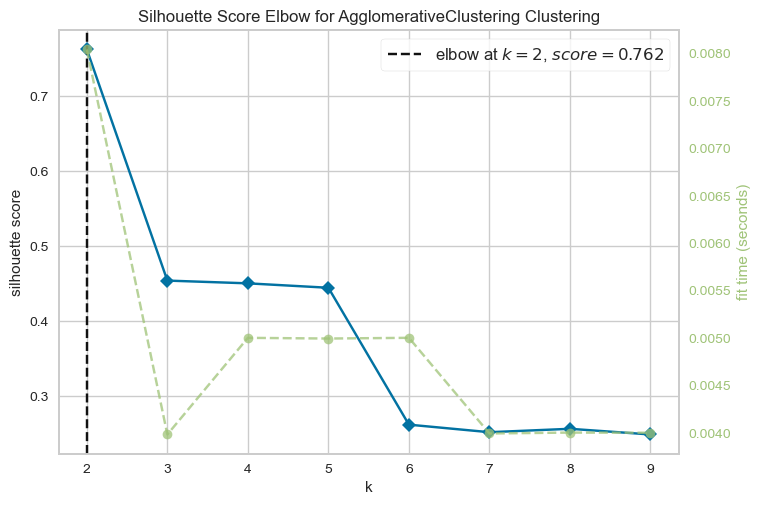

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [41]:
# ELBOW
# Evaluamos con un cluster aglomerativo
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True, metric= "silhouette")
visualizer.fit(df_datos_std_clus.loc[:,['F3','F4','F5']])
visualizer.show()

A continuación se realiza el mismo análisis del número óptimo de grupos utilizando el dataset escalado y el método por defecto de KelbowVisualizer. 


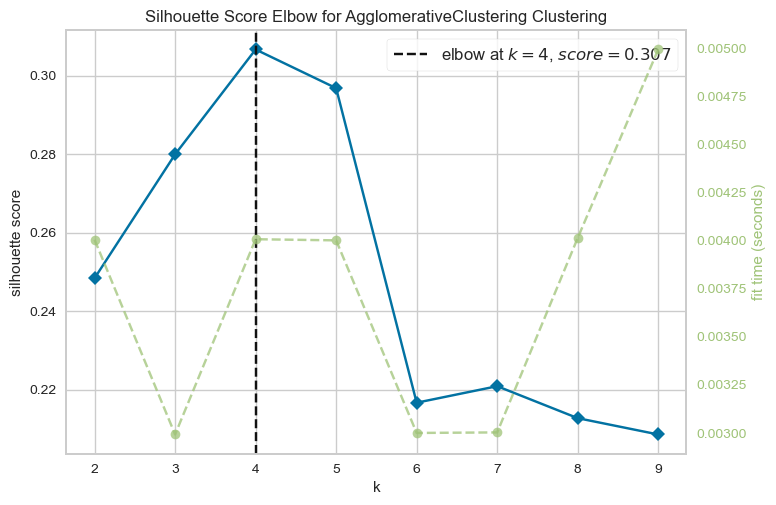

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
# Silhouette

aglomerativoSD = AgglomerativeClustering()
visualizerSD = KElbowVisualizer(aglomerativoSD, k=(2,10),metric = "silhouette", timings = True)
visualizerSD.fit(df_datos_std_clus_std.iloc[:,0:5])
visualizerSD.show()

Implementar la visualización [Silhoutte para cada observación]( https://vitalflux.com/elbow-method-silhouette-score-which-better/#:~:text=Silhouette%20analysis%2Fscores%20and%20related,of%20clusters%20in%20K%2Dmeans)  



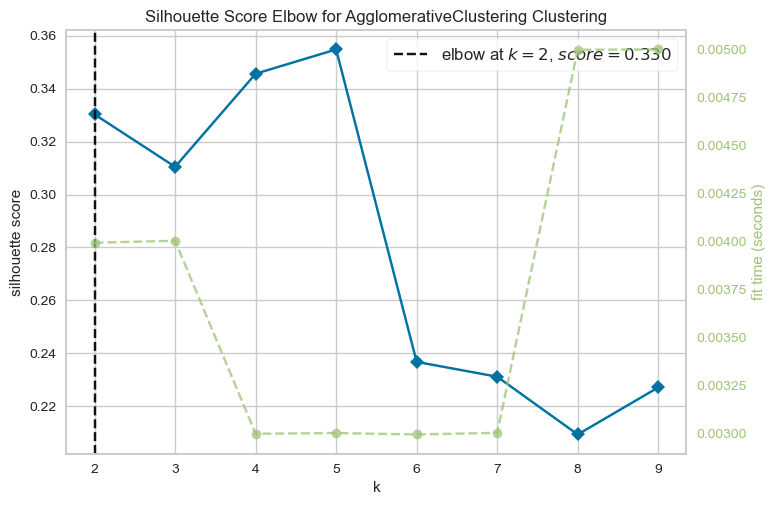

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
# ELBOW
# Evaluamos con un cluster aglomerativo

aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True, metric= "silhouette")
visualizer.fit(df_datos_std_1_clus.iloc[:,0:5]) 
visualizer.show()

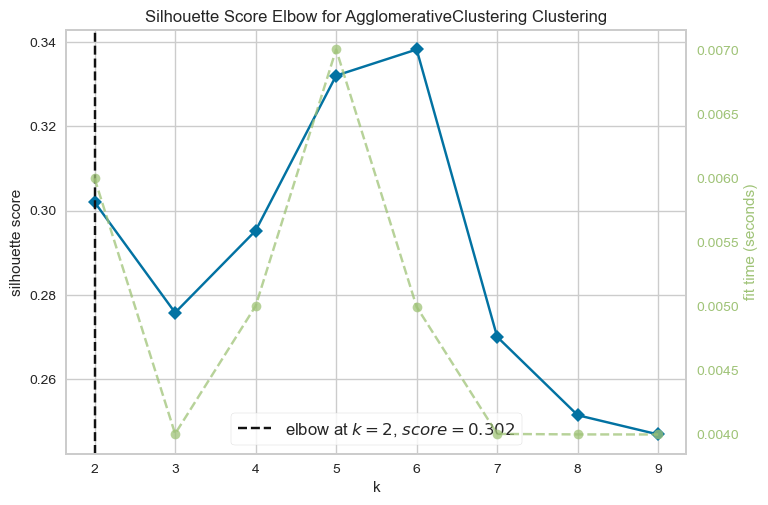

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
# ELBOW
# Evaluamos con un cluster aglomerativo

aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = "silhouette", timings = True)
visualizer.fit(df_datos_std_1_clus_std.iloc[:,0:5]) 
visualizer.show()

Análisis del posible numero de clusters para el dataset 
df_datos_MM_clus y df_datos_MM_clus_std

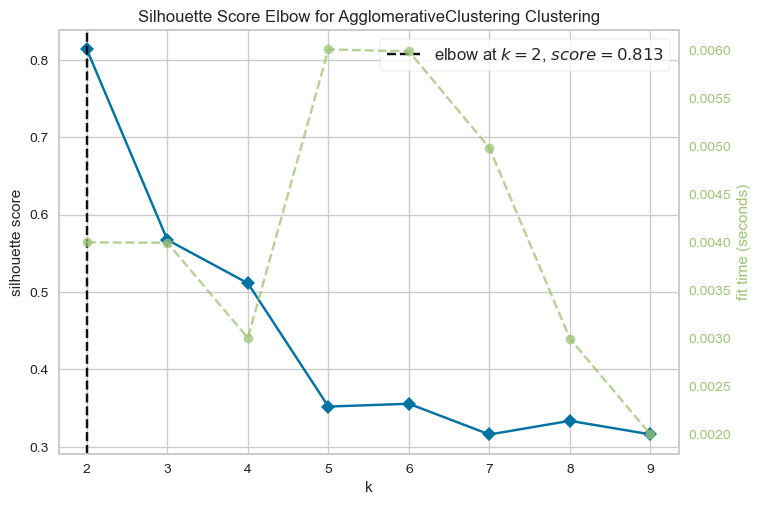

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timing = True)
visualizer.fit(df_datos_MM_clus.loc[:,['F1','F2','F5']])
visualizer.show()

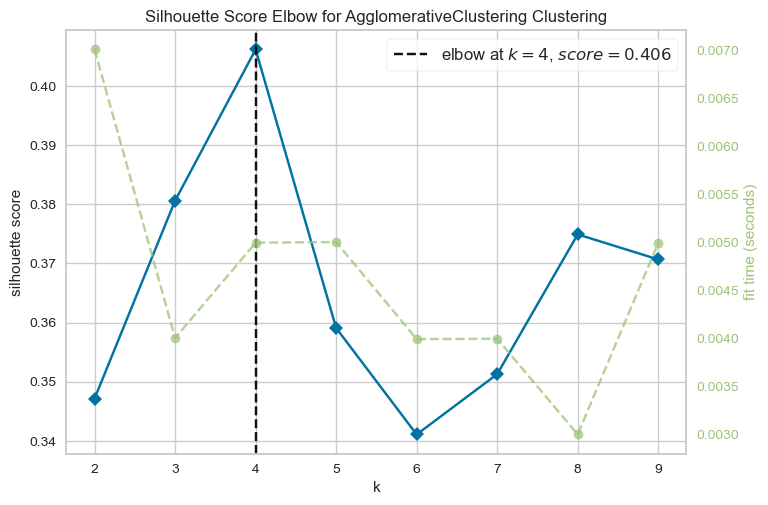

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_MM_clus_std.loc[:,['F1','F4','F5']])
visualizer.show()

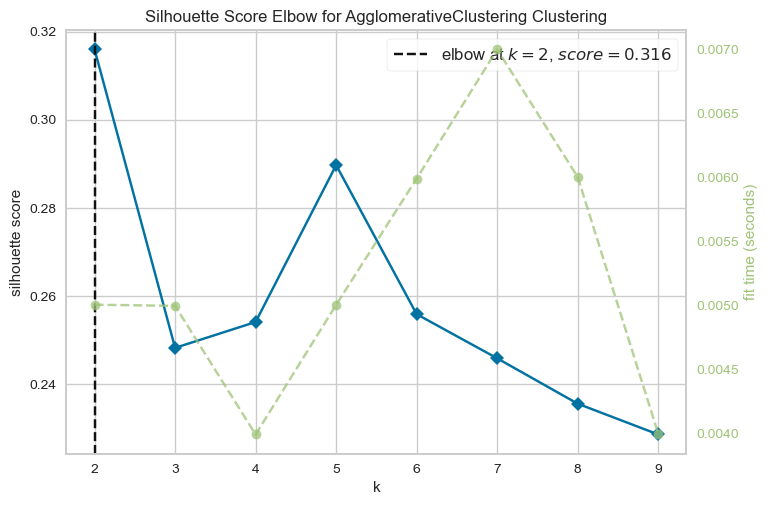

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clus.iloc[:,0:5])
visualizer.show()

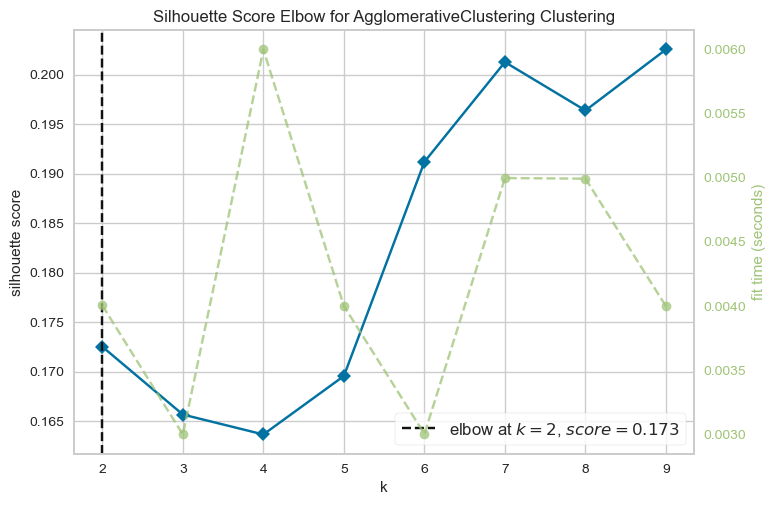

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clus_std.iloc[:,0:5])
visualizer.show()

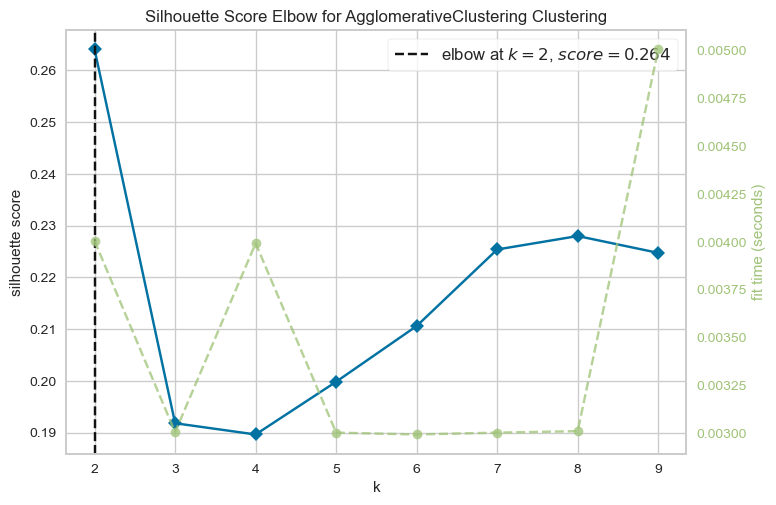

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_1_clus.iloc[:,0:5])
visualizer.show()

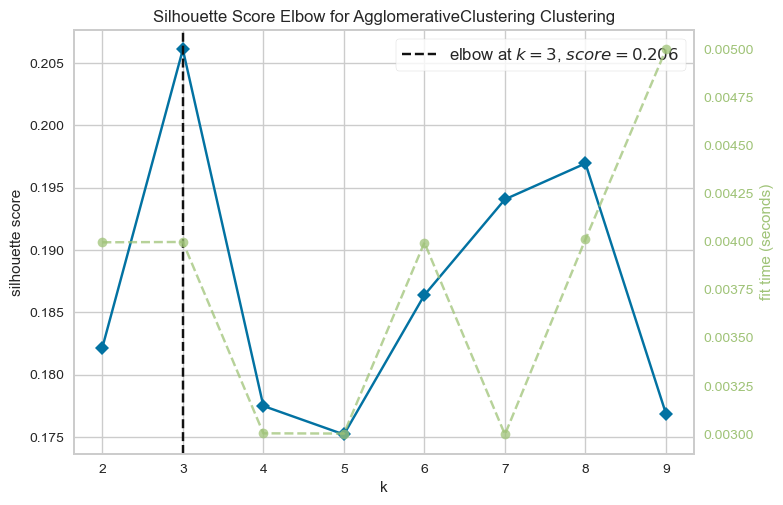

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_1_clus_std.iloc[:,0:5])
visualizer.show()

A continuación vamos a calcular el coeficiente de silhouette de forma no gráfica, para poder hacer una tabla que indique el valor del índice de silhuette para distintas combinaciones de dataset, número de cluster, y variaciones en los parametros de la función de cluster aglomeratativo. 

# 3.- Agrupamiento de las ciudades

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

 Se crea un objeto con los parametros del algoritmo de agrupamiento.

In [52]:
Ag = AgglomerativeClustering(n_clusters=8)

Ajustamos el lector con los datos

In [53]:
Ag.fit(df_datos_MM_clus_std.loc[:,['F1','F4','F5']])

AgglomerativeClustering(n_clusters=8)

Se guarda en una variable el array con las etiquetas para cada observación

In [59]:
labels = Ag.labels_
labels

array([2, 5, 2, 4, 1, 1, 2, 4, 1, 7, 2, 4, 6, 4, 2, 5, 6, 5, 1, 4, 4, 2,
       1, 5, 5, 4, 2, 4, 5, 5, 6, 5, 4, 6, 2, 0, 4, 4, 4, 7, 6, 1, 1, 7,
       0, 5, 2, 1, 4, 4, 2, 0, 2, 3, 4, 1, 4, 1, 4, 6, 6, 4, 6, 3, 4, 0,
       4, 4, 2, 6, 4], dtype=int64)

Investigando formas de contar el número de casos en un array

In [55]:
from collections import Counter
Counter(Ag.labels_)


Counter({4: 22, 2: 12, 1: 10, 5: 9, 6: 9, 0: 4, 7: 3, 3: 2})

In [61]:
labels_count = pd.Series(labels).value_counts()

In [62]:
label_count_dict = labels_count.to_dict()

In [63]:
label_count_dict

{4: 22, 2: 12, 1: 10, 5: 9, 6: 9, 0: 4, 7: 3, 3: 2}

Se crea una nueva variable llamada "cluster" en el dataset utilizado para generar los agrupamientos. En esta variable se identifica el cluster que corresponde a cada agrupamiento. 

In [64]:
df_datos_MM_clus_std["cluster"] = labels

In [65]:
df_datos_MM_clus_std

F1        F2        F3        F4        F5           Ciudades  \
0  -0.339004 -0.170308  0.737639  0.658019 -0.968441           Albacete   
1   0.353123 -0.312326  0.162017 -0.788795  1.132316  Alcalá de Henares   
2   0.210770 -0.444145  4.403449  0.650693 -1.208234         Alcobendas   
3  -0.198495 -0.525388  1.214254 -0.995589 -0.363245           Alcorcón   
4  -0.988271 -0.266973 -1.088169  1.482223 -0.058267          Algeciras   
..       ...       ...       ...       ...       ...                ...   
66 -0.551143  1.228807 -0.297478 -0.596613 -0.375522           Valencia   
67  0.116281  0.025064  0.866933 -0.618992 -0.183761         Valladolid   
68 -0.418617  0.741560  0.670436  0.967684  0.302836               Vigo   
69  0.595497 -0.607522 -0.649497 -0.758174 -0.148395             Zamora   
70 -0.075722  0.889821  0.736150 -0.049457 -0.807753           Zaragoza   

    cluster  
0         2  
1         5  
2         2  
3         4  
4         1  
..      ...  
66        4  
67        4  
68        2  
69        6  
70        4  

[71 rows x 7 columns]

In [66]:
df_datos_MM_clus_std.head(5)

F1        F2        F3        F4        F5           Ciudades  \
0 -0.339004 -0.170308  0.737639  0.658019 -0.968441           Albacete   
1  0.353123 -0.312326  0.162017 -0.788795  1.132316  Alcalá de Henares   
2  0.210770 -0.444145  4.403449  0.650693 -1.208234         Alcobendas   
3 -0.198495 -0.525388  1.214254 -0.995589 -0.363245           Alcorcón   
4 -0.988271 -0.266973 -1.088169  1.482223 -0.058267          Algeciras   

   cluster  
0        2  
1        5  
2        2  
3        4  
4        1

El número de ciudades en cada agrupamiento se muestra a continuación.

In [67]:
df_datos_MM_clus_std['cluster'].value_counts()

cluster
4    22
2    12
1    10
5     9
6     9
0     4
7     3
3     2
Name: count, dtype: int64

# V.- Representación gráfica

Una forma de identificar que tan sobrepuestos están los elementos de los agrupamientos es construir una gráfica donde visualizen las medias de cada grupo y ver que tan cerca se encuentran. Para esto vamos a cambiar de formato largo a ancho usando melt.

In [68]:
im3_melt = df_datos_MM_clus_std.loc[:,['F1','F2','F3','F4','F5','cluster']].melt(id_vars = 'cluster')

Se agrupan los datos por agrupamiento y se calcula la media por factor para cada cluster

In [71]:
 im3_groups_mean = im3_melt.groupby(['variable','cluster'])['value'].mean().reset_index() ### 
 im3_groups_mean.head(3)

variable  cluster     value
0       F1        0  3.274214
1       F1        1 -0.975745
2       F1        2 -0.310431

Se importa la librería Seaborn y construimos la gráfica

In [72]:
import seaborn.objects as so
from seaborn import axes_style

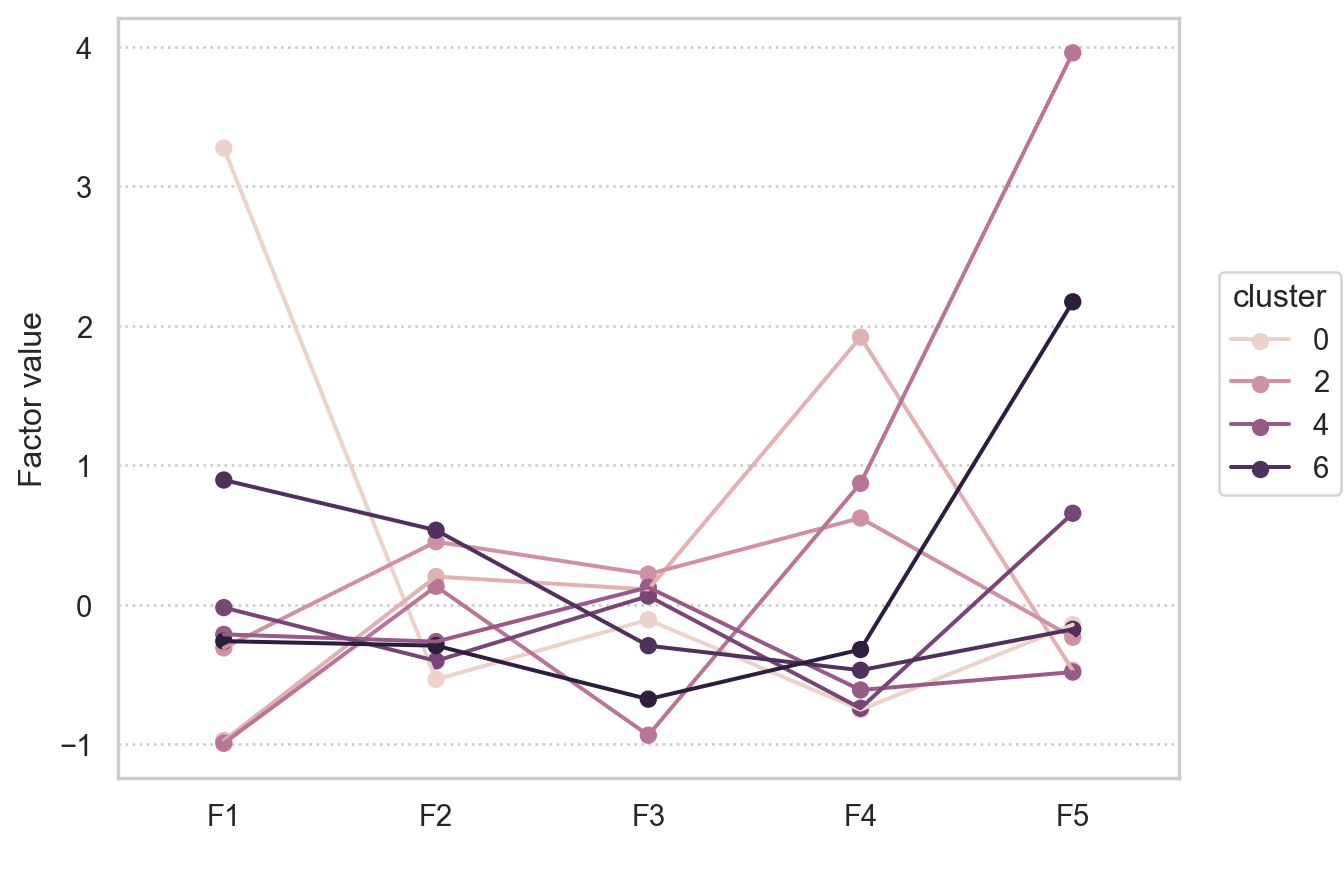

In [73]:
custom_palette = ["red", "green", "blue","black","gray"]

(
    so.Plot(im3_groups_mean, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

## Representación gráfica por factor. Podemos ver la distribución de los puntos en un gráfico 2D, para cada combinación de factores. Y en una gráfica 3D para todas las combinaciones de 3 factores. 

Utilizamos plotly para hacer gráficas interactivas

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

In [75]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F1': 'F1_PATCH AGGREGATION COMPLEXITY',
                     'F4': 'F4_FRAGMENTED HOUSING DOMINANCE',
                                          
                 })
fig.show()

In [76]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F1': 'F1_PATCH AGGREGATION COMPLEXITY',
                     'F5': 'F5_LANDSCAPE SHAPE COMPLEXITY',
                                          
                 })
fig.show()

In [77]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F2': 'F2_POPULATION DRIVEN LANDSCAPE COMPLEXITY',
                     'F5': 'F5_LANDSCAPE SHAPE COMPLEXITY',
                                          
                 })
fig.show()

In [78]:
fig = px.scatter(df_datos_MM_clus_std,x='F4', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                  labels = {
                     'F4': 'F4_Fragmented Housing Dominance',
                     'F5': 'F5_LANDSCAPE SHAPE COMPLEXITY',
                                          
                 })
fig.show()

In [79]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F3', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F2': 'F2_Population Driven Landscape Complexity',
                     'F3': 'F3_Patches size aggregated landscape',
                                          
                 })
fig.show()

In [80]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F2': 'F2_Population Driven Landscape Complexity',
                     'F4': 'F4_Fragmented housing dominance'})
fig.show()

In [81]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F2': 'F2_Population Driven Landscape Complexity',
                     'F5': 'F5_Landscape Shape complexity'})
fig.show()

In [82]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F4': 'F4_Fragmented Housing Dominance',
                     'F3': 'F3_Patches size aggregated landscape'})
fig.show()

In [83]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F5': 'F5_Landscape shape Complexity',
                     'F3': 'F3_Patches size aggregated landscape'})
fig.show()

In [84]:
fig = px.scatter(df_datos_MM_clus_std,x='F4', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'],
                 labels = {
                     'F4': 'F4_Fragmented Housing dominance',
                     'F5': 'F5_Landscape Shape complexity'})
fig.show()

# Es posible hacer gráficas 3D

MM_F2: Population Driven Landscape Complexity
MM_F1: Patch Aggregation Complexity
MM_F4: Fragmented Housing Dominance
MM_F5: Landscape Shape Complexity
MM_F3: Patches size aggregated landscape


In [85]:
import plotly.express as px

fig = px.scatter_3d(df_datos_MM_clus_std,
                    x = 'F1',
                    y = 'F4',
                    z = 'F5',
                    color = 'cluster',
                     hover_data=["Ciudades", 'cluster'],
                     labels = {
                     'F1': 'F1_PAC',
                     'F4': 'F4_FHD',
                     'F5': 'F5_LSC'
                     })

fig.show()

# 7.- Función para calcular clusteres

In [86]:
def analyzing_Agglomerative_clustering(df,n):
    Ag = AgglomerativeClustering(n_clusters=n)
    Ag.fit(df)
    df['cluster_'+ str(n)] = Ag.labels_
    return df

El análisis previo de Silhouette indica que para el dataset df_datos_stsd_clus el número de grupos con mejor un valor más alto del índice de Silhouette es de 4, y 5. 

In [87]:
df_datos_std_clus_cluster_4 = analyzing_Agglomerative_clustering(df_datos_std_clus.iloc[:,0:5],4)
df_datos_std_clus_cluster_5 = analyzing_Agglomerative_clustering(df_datos_std_clus.iloc[:,0:5],5)

In [88]:
df_datos_std_clus_cluster_4['cluster_4'].value_counts()

cluster_4
0    40
2    17
3    12
1     2
Name: count, dtype: int64

In [89]:
df_datos_std_clus_cluster_5['cluster_5'].value_counts()

cluster_5
2    36
0    17
3    12
4     4
1     2
Name: count, dtype: int64

En cambio para el estandarizado es de df_datos_stsd_clus_std es de 6 y 5

In [90]:
df_datos_std_clus_std_cluster_6 = analyzing_Agglomerative_clustering(df_datos_std_clus_std.iloc[:,0:5],6)
df_datos_std_clus_std_cluster_5 = analyzing_Agglomerative_clustering(df_datos_std_clus_std.iloc[:,0:5],5)

In [91]:
df_datos_std_clus_std_cluster_6['cluster_6'].value_counts()

cluster_6
0    24
1    16
2    16
4     9
3     4
5     2
Name: count, dtype: int64

In [92]:
df_datos_std_clus_std_cluster_5['cluster_5'].value_counts()

cluster_5
0    40
1    16
4     9
3     4
2     2
Name: count, dtype: int64

Para el dataset df_datos_MM_clus el número sugerido es de 5, 6 

In [93]:
df_datos_std_clus_std_cluster_5['cluster_5'].value_counts()

cluster_5
0    40
1    16
4     9
3     4
2     2
Name: count, dtype: int64

Para el dataset df_datos_MM_clus_std el número sugerido es de 3, 6, 8 pero todos con valores de Silhouette inferioes a 0.30. 


Para el dataset df_datos_Ptrans_clus el número óptimo sugerido es de 2, y 5. 

In [94]:
df_datos_Ptrans_clus_cluster_5 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus.iloc[:,0:5],5)

Para el escalado es de 7 y 9, pero en todos los casos con menos de 0.3 de Silhouette. 

In [91]:
df_datos_Ptrans_clus_std_cluster_7 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus_std.iloc[:,0:5],7)
df_datos_Ptrans_clus_std_cluster_9 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus_std.iloc[:,0:5],9)

A continuación se define una función para calcular la equitatividad de los grupos identificados con el cluster aglomerativo

In [ ]:
def calculate_eveness(data):
    labels_count = pd.Series(data).value_counts()
    total = labels_count.sum()
    proportions = labels_count/total
    shannon_entropy = -np.sum(proportions * np.log(proportions))
    max_entropy = np.log(len(labels_count))
    eveness = shannon_entropy / max_entropy
    return eveness

La función que se muestra a continuación permite el cálculo del cluster aglomerativo, devolviendo valor de silhouette,
el número de elementos en cada grupo, y la equitatividad.

In [96]:
def Silhouette_score_n(df,n, linkage):
    Ag = AgglomerativeClustering(n_clusters=n, linkage = linkage )
    Ag.fit(df)
    numero_elementos = pd.Series(Ag.labels_).value_counts()
    numero_elementos_dict = numero_elementos.to_dict()
    eveness = calculate_eveness(Ag.labels_)
    return (silhouette_score(df, Ag.labels_),numero_elementos_dict,eveness)

In [97]:
Silhouette_score_n(df_datos_std_clus_std.iloc[:,0:5],5,'ward')

(0.2967783009536205, {0: 40, 1: 16, 4: 9, 3: 4, 2: 2}, 0.7353383482671385)

A continuación se define una función que permite crear un dataframe agregando de forma iterativa los resultados de aplicar la función Silhouette_score_n para una combinación de n_cluster, dataset, y linkage_methods.

In [98]:
def sil_score_df(df,df_name,n):
    
    df_inicial = pd.DataFrame(columns=["dataset","factors","n_cluster","linkage","silhouette_score","n_elements", "eveness"])
    linkage_methods = ['ward','complete','average','single']
    count = 0
    for i in range(2,n):
        for j in range(len(linkage_methods)):
            score = Silhouette_score_n(df,i,linkage_methods[j])
            columns = df.columns.tolist()
            df_inicial.loc[count] = [f"{df_name}",columns,i,linkage_methods[j],score[0],score[1],score[2]]
            count += 1
        

    return df_inicial

In [99]:
sil_score_df(df_datos_std_clus_std.iloc[:,0:5],'df_datos_Ptrans_clus_std',10)

dataset               factors  n_cluster   linkage  \
0   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2      ward   
1   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2  complete   
2   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2   average   
3   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2    single   
4   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3      ward   
5   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3  complete   
6   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3   average   
7   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3    single   
8   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4      ward   
9   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4  complete   
10  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4   average   
11  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4    single   
12  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5      ward   
13  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5  complete   
14  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5   average   
15  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5    single   
16  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6      ward   
17  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6  complete   
18  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6   average   
19  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6    single   
20  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7      ward   
21  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7  complete   
22  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7   average   
23  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7    single   
24  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8      ward   
25  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8  complete   
26  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8   average   
27  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8    single   
28  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9      ward   
29  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9  complete   
30  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9   average   
31  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9    single   

    silhouette_score                                         n_elements  \
0           0.248408                                     {0: 46, 1: 25}   
1           0.545326                                      {0: 69, 1: 2}   
2           0.545326                                      {0: 69, 1: 2}   
3           0.594198                                      {0: 70, 1: 1}   
4           0.279932                               {0: 44, 1: 25, 2: 2}   
5           0.426438                                {0: 68, 1: 2, 2: 1}   
6           0.426438                                {0: 68, 1: 2, 2: 1}   
7           0.409886                                {0: 69, 2: 1, 1: 1}   
8           0.306629                         {1: 40, 0: 25, 3: 4, 2: 2}   
9           0.388289                          {0: 64, 3: 4, 1: 2, 2: 1}   
10          0.388289                          {1: 64, 3: 4, 0: 2, 2: 1}   
11          0.357472                          {0: 68, 2: 1, 3: 1, 1: 1}   
12          0.296778                   {0: 40, 1: 16, 4: 9, 3: 4, 2: 2}   
13          0.186099                   {0: 54, 4: 10, 3: 4, 1: 2, 2: 1}   
14          0.360395                    {0: 64, 1: 4, 2: 1, 4: 1, 3: 1}   
15          0.339139                    {0: 67, 2: 1, 4: 1, 3: 1, 1: 1}   
16          0.216705            {0: 24, 1: 16, 2: 16, 4: 9, 3: 4, 5: 2}   
17          0.250582             {0: 45, 4: 10, 2: 9, 3: 4, 1: 2, 5: 1}   
18          0.234529              {1: 63, 0: 4, 5: 1, 4: 1, 3: 1, 2: 1}   
19          0.331052              {0: 66, 5: 

In [102]:
datasets = [df_datos_std_clus.iloc[:,0:5], df_datos_std_clus_std.iloc[:,0:5],
            df_datos_std_TM_clus.iloc[:,0:5], df_datos_std_TM_clus_std.iloc[:,0:5],
            df_datos_std_TMB_clus.iloc[:,0:5], df_datos_std_TMB_clus_std.iloc[:,0:5],
            df_datos_std_1_clus.iloc[:,0:5], df_datos_std_1_clus_std.iloc[:,0:5],
            df_datos_std_1_TM_clus.iloc[:,0:5], df_datos_std_1_TM_clus_std.iloc[:,0:5],
            df_datos_std_1_TMB_clus.iloc[:,0:5], df_datos_std_1_TMB_clus_std.iloc[:,0:5],
            df_datos_MM_clus.iloc[:,0:5], df_datos_MM_clus_std.iloc[:,0:5], 
            df_datos_MM_TM_clus.iloc[:,0:5], df_datos_MM_TM_clus_std.iloc[:,0:5],
            df_datos_MM_TMB_clus.iloc[:,0:5], df_datos_MM_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_clus.iloc[:,0:5], df_datos_Ptrans_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TM_clus.iloc[:,0:5], df_datos_Ptrans_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TMB_clus.iloc[:,0:5], df_datos_Ptrans_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_clus.iloc[:,0:5], df_datos_Ptrans_1_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TM_clus.iloc[:,0:5], df_datos_Ptrans_1_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TMB_clus.iloc[:,0:5], df_datos_Ptrans_1_TMB_clus_std.iloc[:,0:5]

            ]


datasets_names = ["df_datos_std_clus", "df_datos_std_clus_std",
                  "df_datos_std_TM_clus", "df_datos_std_TM_clus_std",
                   "df_datos_std_TMB_clus", "df_datos_std_TMB_clus_std", 
                  "df_datos_std_1_clus", "df_datos_std_1_clus_std",
                  "df_datos_std_1_TM_clus", "df_datos_std_1_TM_clus_std",
                  "df_datos_std_1_TMB_clus", "df_datos_std_1_clus_TMB_std",
                  "df_datos_MM_clus", "df_datos_MM_clus_std",
                  "df_datos_MM_TM_clus", "df_datos_MM_TM_clus_std",
                  "df_datos_MM_TMB_clus", "df_datos_MM_TMB_clus_std", 
                  "df_datos_Ptrans_clus", "df_datos_Ptrans_clus_std",
                  "df_datos_Ptrans_TM_clus", "df_datos_Ptrans_TM_clus_std",
                  "df_datos_Ptrans_TMB_clus", "df_datos_Ptrans_TMB_clus_std",
                  "df_datos_Ptrans_1_clus", "df_datos_Ptrans_1_clus_std",
                  "df_datos_Ptrans_1_TM_clus", "df_datos_Ptrans_1_TM_clus_std",
                  "df_datos_Ptrans_1_TMB_clus", "df_datos_Ptrans_1_TMB_clus_std"]

Ahora debemos ejecturar esta función en distintos dataframes

In [103]:
df_list = []

for i in range(len(datasets_names)):
    df_list.append(sil_score_df(datasets[i],datasets_names[i],10))


df_final = pd.concat(df_list)
    

In [104]:
df_final.head(10)

dataset               factors  n_cluster   linkage  \
0  df_datos_std_clus  [F1, F2, F3, F4, F5]          2      ward   
1  df_datos_std_clus  [F1, F2, F3, F4, F5]          2  complete   
2  df_datos_std_clus  [F1, F2, F3, F4, F5]          2   average   
3  df_datos_std_clus  [F1, F2, F3, F4, F5]          2    single   
4  df_datos_std_clus  [F1, F2, F3, F4, F5]          3      ward   
5  df_datos_std_clus  [F1, F2, F3, F4, F5]          3  complete   
6  df_datos_std_clus  [F1, F2, F3, F4, F5]          3   average   
7  df_datos_std_clus  [F1, F2, F3, F4, F5]          3    single   
8  df_datos_std_clus  [F1, F2, F3, F4, F5]          4      ward   
9  df_datos_std_clus  [F1, F2, F3, F4, F5]          4  complete   

   silhouette_score                   n_elements   eveness  
0          0.695009                {0: 69, 1: 2}  0.185125  
1          0.695009                {0: 69, 1: 2}  0.185125  
2          0.695009                {1: 69, 0: 2}  0.185125  
3          0.734451                {0: 70, 1: 1}  0.106792  
4          0.299641         {2: 40, 0: 29, 1: 2}  0.718669  
5          0.343438          {2: 64, 0: 5, 1: 2}  0.346766  
6          0.583070          {0: 69, 2: 1, 1: 1}  0.134573  
7          0.583070          {0: 69, 2: 1, 1: 1}  0.134573  
8          0.276923  {0: 40, 2: 17, 3: 12, 1: 2}  0.769356  
9          0.314463    {2: 64, 1: 4, 0: 2, 3: 1}  0.300226

In [105]:
color_palette = ['red', 'blue', 'green', 'purple']
fig = px.scatter(df_final,x='n_cluster', y='silhouette_score', color ='linkage',
                 color_discrete_sequence=color_palette,
                  size_max=1, hover_data = ["dataset","linkage","silhouette_score"])
fig.show()

### A continuación evaluaremos clusters probando toda la combinación de variables.

In [106]:
import itertools

# lista de elementos
elements = ["F1", "F2", "F3", "F4", "F5"]

# List to store combinations
all_combinations = []

# Generar las combinaciones desde 2 al largo de la lista
for r in range(2, len(elements) + 1):
    combinations = list(itertools.combinations(elements, r))
    all_combinations.extend(combinations)

# convertir las tuplas a listas
all_combinations = [list(comb) for comb in all_combinations]

# Ver los resultados
print(all_combinations)


[['F1', 'F2'], ['F1', 'F3'], ['F1', 'F4'], ['F1', 'F5'], ['F2', 'F3'], ['F2', 'F4'], ['F2', 'F5'], ['F3', 'F4'], ['F3', 'F5'], ['F4', 'F5'], ['F1', 'F2', 'F3'], ['F1', 'F2', 'F4'], ['F1', 'F2', 'F5'], ['F1', 'F3', 'F4'], ['F1', 'F3', 'F5'], ['F1', 'F4', 'F5'], ['F2', 'F3', 'F4'], ['F2', 'F3', 'F5'], ['F2', 'F4', 'F5'], ['F3', 'F4', 'F5'], ['F1', 'F2', 'F3', 'F4'], ['F1', 'F2', 'F3', 'F5'], ['F1', 'F2', 'F4', 'F5'], ['F1', 'F3', 'F4', 'F5'], ['F2', 'F3', 'F4', 'F5'], ['F1', 'F2', 'F3', 'F4', 'F5']]


In [107]:
df_list = []

for i in range(len(datasets_names)):
    for j in all_combinations:
       df_list.append(sil_score_df(datasets[i].loc[:,j],datasets_names[i],10))


df_final = pd.concat(df_list).reset_index(drop = True)

Visualizamos los resultados de la tabla y exportamos los datos

In [108]:
df_final.query("n_cluster > 7").sort_values(by = "silhouette_score", ascending = False).head(10)

dataset   factors  n_cluster   linkage  \
10170         df_datos_MM_clus  [F2, F4]          8   average   
12666  df_datos_MM_TM_clus_std  [F2, F4]          8   average   
11001     df_datos_MM_clus_std  [F2, F4]          8  complete   
10041         df_datos_MM_clus  [F1, F3]          8  complete   
11002     df_datos_MM_clus_std  [F2, F4]          8   average   
10842     df_datos_MM_clus_std  [F1, F2]          8   average   
11705      df_datos_MM_TM_clus  [F1, F3]          8  complete   
6073   df_datos_std_1_clus_std  [F3, F4]          8  complete   
13369     df_datos_MM_TMB_clus  [F1, F3]          8  complete   
11738      df_datos_MM_TM_clus  [F1, F4]          8   average   

       silhouette_score                                         n_elements  \
10170          0.518613  {0: 50, 2: 8, 4: 5, 1: 2, 3: 2, 6: 2, 5: 1, 7: 1}   
12666          0.515615  {4: 43, 0: 13, 6: 4, 5: 3, 2: 3, 1: 2, 7: 1, 3...   
11001          0.506573  {0: 41, 2: 10, 6: 8, 1: 5, 5: 3, 3: 2, 7: 1, 4...   
10041          0.505793  {4: 22, 0: 22, 7: 14, 3: 6, 1: 3, 2: 2, 5: 1, ...   
11002          0.505170  {6: 43, 3: 8, 2: 8, 0: 5, 1: 3, 4: 2, 5: 1, 7: 1}   
10842          0.504139  {5: 34, 3: 13, 1: 8, 2: 8, 0: 4, 6: 2, 7: 1, 4...   
11705          0.502912  {0: 22, 4: 21, 7: 14, 3: 6, 1: 3, 2: 2, 5: 1, ...   
6073           0.502740  {0: 40, 6: 13, 1: 6, 3: 6, 2: 3, 4: 1, 5: 1, 7...   
13369          0.502327  {0: 22, 4: 20, 7: 14, 3: 6, 1: 3, 2: 2, 5: 1, ...   
11738          0.500372  {1: 41, 0: 14, 2: 7, 7: 2, 5: 2, 3: 2, 6: 1, 4...   

        eveness  
10170  0.529716  
12666  0.610024  
11001  0.663796  
10041  0.773941  
11002  0.642902  
10842  0.739684  
11705  0.776838  
6073   0.656689  
13369  0.779587  
11738  0.621123

In [109]:
df_final.to_csv('df_final.csv')

A continuación generamos una visualización de dudosa utilidad. 

In [110]:
#color_palette = ['red', 'blue', 'green', 'white']
fig = px.scatter(df_final.query("n_cluster > 1"),x='n_cluster', y='silhouette_score', color ='linkage',
                 #color_discrete_sequence=color_palette,
                  size_max=0.0, hover_data = ["dataset","linkage","factors","silhouette_score"])
fig.show()

# FIN